In [2]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [6]:
df = pd.read_csv("virat.csv")
df1 = pd.read_csv("Data+Dictionary-Cricket.csv")

In [10]:
df1.head(11)
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [25]:
## Your code here
df.Runs.info()
df["Runs"]= df.Runs.apply(lambda x: int(x.replace('*', '')))


<class 'pandas.core.series.Series'>
RangeIndex: 132 entries, 0 to 131
Series name: Runs
Non-Null Count  Dtype
--------------  -----
132 non-null    int64
dtypes: int64(1)
memory usage: 1.2 KB


AttributeError: 'int' object has no attribute 'replace'

In [27]:
arr_run= np.array(df.Runs)
#arr_run.dtype
np.percentile(arr_run, 50)-np.percentile(arr_run, 25)
#df.Runs.describe()

22.5

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


{'whiskers': [<matplotlib.lines.Line2D at 0x210a58d93d0>,
 'caps': [<matplotlib.lines.Line2D at 0x210a58d99a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x210a58d9250>],
 'medians': [<matplotlib.lines.Line2D at 0x210a58d9f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x210a58eb250>],
 'means': []}

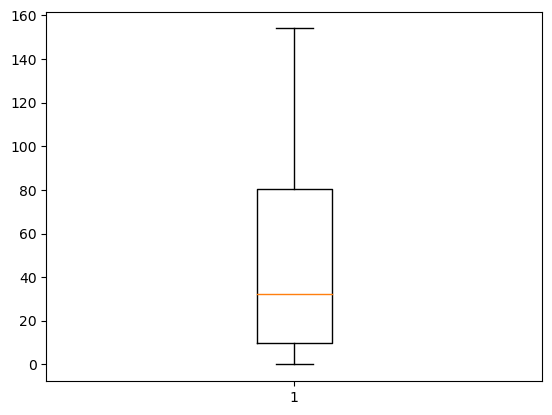

In [28]:
#Your code here
plt.boxplot(df.Runs)

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [54]:
## Your code here
#df.head()
#df1.head()

df['year'] = pd.DatetimeIndex(df['Start Date']).year
print(df.year.value_counts())
highestrun_avg=pd.pivot_table(data=df, index='year', aggfunc={'Runs': np.mean})
print(highestrun_avg)
highestrun=pd.pivot_table(data=df, index='year', aggfunc={'Runs': np.max})
print(highestrun)


2011    31
2013    23
2014    17
2010    16
2012    11
2015    10
2016    10
2009     6
2008     5
2017     3
Name: year, dtype: int64
           Runs
year           
2008  31.800000
2009  38.333333
2010  45.375000
2011  42.000000
2012  40.363636
2013  47.826087
2014  58.529412
2015  30.400000
2016  73.900000
2017  61.666667
      Runs
year      
2008    54
2009   107
2010   118
2011   117
2012   128
2013   115
2014   139
2015   138
2016   154
2017   122


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


C:\Users\ziyae\AppData\Local\Temp\ipykernel_33880\3634926151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Mins'] = df2['Mins'].apply(lambda x: int(x))


(array([28., 13., 12.,  9.,  6.,  6.,  9.,  4.,  9., 11.,  4.,  6.,  3.,
         2.,  4.]),
 array([  1. ,  14.4,  27.8,  41.2,  54.6,  68. ,  81.4,  94.8, 108.2,
        121.6, 135. , 148.4, 161.8, 175.2, 188.6, 202. ]),
 <BarContainer object of 15 artists>)

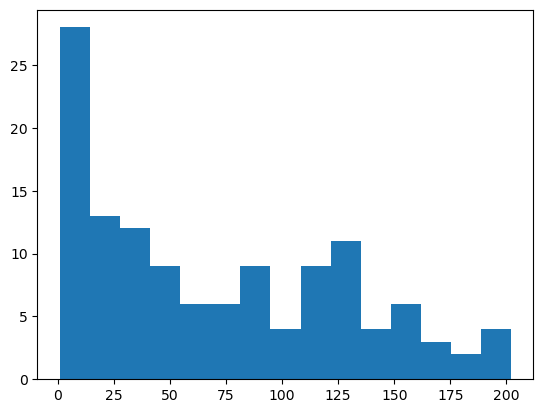

In [59]:
#Your code here
df2 = df[~(df['Mins']== "-")]
df2['Mins'] = df2['Mins'].apply(lambda x: int(x))

plt.hist(df2.Mins, bins=15)